
📊 Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.71      0.83      2272
           1       0.87      0.84      0.86      7109
           2       0.87      0.95      0.91     10973

    accuracy                           0.88     20354
   macro avg       0.91      0.83      0.86     20354
weighted avg       0.89      0.88      0.88     20354

Confusion Matrix:
 [[ 1612   286   374]
 [   13  5962  1134]
 [    2   579 10392]]
Accuracy: 0.8826766237594575


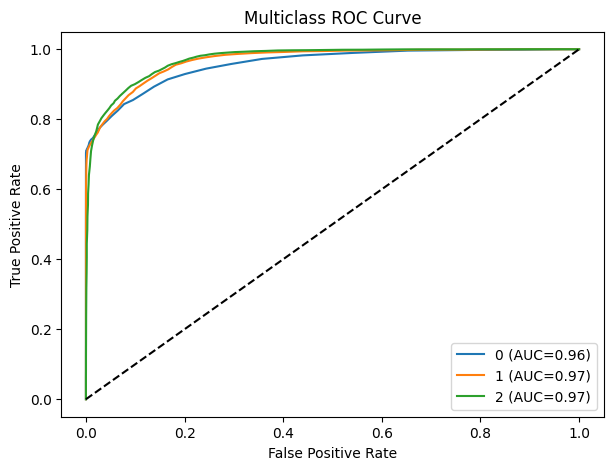

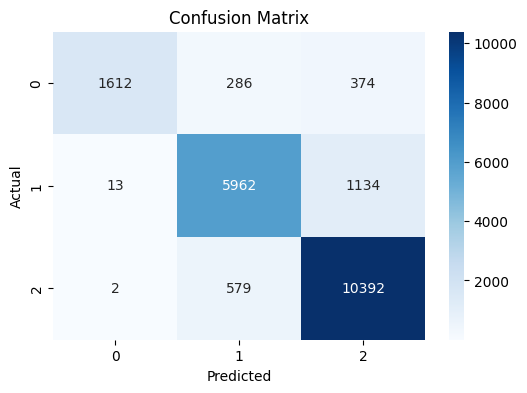

In [9]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ 1️⃣ Predictions
y_pred = best_model.predict(X_test)

# Handle predict_proba safely
try:
    y_prob = best_model.predict_proba(X_test)
except:
    y_prob = None

# ✅ 2️⃣ Evaluation Metrics
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

# ✅ 3️⃣ ROC-AUC (Binary or Multiclass)
if y_prob is not None:
    if y_prob.ndim == 1 or y_prob.shape[1] == 1:
        # Binary case
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.figure(figsize=(6,4))
        plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {auc:.2f})')
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("ROC Curve (Binary)")
        plt.legend()
        plt.show()
    else:
        # Multiclass case
        y_test_bin = label_binarize(y_test, classes=best_model.classes_)
        plt.figure(figsize=(7,5))
        for i in range(y_prob.shape[1]):
            fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            auc = roc_auc_score(y_test_bin[:, i], y_prob[:, i])
            plt.plot(fpr, tpr, label=f"{best_model.classes_[i]} (AUC={auc:.2f})")
        plt.plot([0,1], [0,1], 'k--')
        plt.xlabel("False Positive Rate")
        plt.ylabel("True Positive Rate")
        plt.title("Multiclass ROC Curve")
        plt.legend()
        plt.show()
else:
    print("\n⚠️ Model does not support predict_proba(), skipping ROC curve.")

# ✅ 4️⃣ Confusion Matrix Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
